In [26]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read in dataset

In [10]:
# Load data
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [35]:
# Extract relevant columns
df = df[['GrLivArea', 'SalePrice']].dropna()

# Separate features and target
X = df['GrLivArea'].values.reshape(-1, 1)
y = df['SalePrice'].values

# Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: train/test split for fair evaluation (not required but recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Train a LinearRegression model using scikit-learn

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model on training data
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.4f}")


MSE: 3418946311.18
RMSE: 58471.76
MAE: 38341.20
R² Score: 0.5543


##  Plot the Regression Line alongside Actual Data

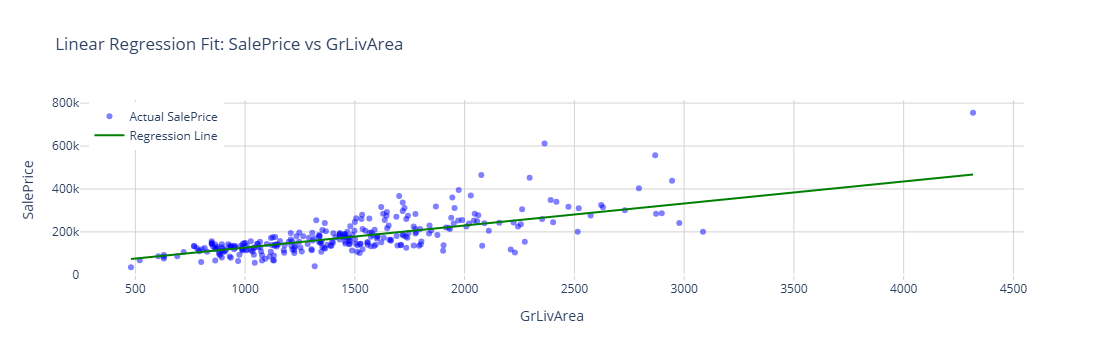

In [30]:
# Inverse transform scaled X to original scale for plotting
X_test_orig = scaler.inverse_transform(X_test)

# Sort X_test and corresponding predictions for a smooth line plot
sorted_idx = X_test_orig.flatten().argsort()
X_test_sorted = X_test_orig[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Create figure
fig = go.Figure()

# Add scatter plot of actual values
fig.add_trace(go.Scatter(
    x=X_test_orig.flatten(),
    y=y_test,
    mode='markers',
    name='Actual SalePrice',
    marker=dict(color='blue', opacity=0.5)
))

# Add regression line
fig.add_trace(go.Scatter(
    x=X_test_sorted.flatten(),
    y=y_pred_sorted,
    mode='lines',
    name='Regression Line',
    line=dict(color='green', width=2)
))

# Update layout
fig.update_layout(
    title='Linear Regression Fit: SalePrice vs GrLivArea',
    xaxis_title='GrLivArea',
    yaxis_title='SalePrice',
    legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
    hovermode='x unified',
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray')
)

fig.show()

## Compute performance metrics (MSE or RMSE)

In [47]:
# Compute MSE and RMSE on test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mse = mean_squared_error(y, model.predict(X))
r2 = r2_score(y, model.predict(X))
print(f"MSE: {mse:.2f}, R-squared: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


MSE: 3139843209.67, R-squared: 0.5021
Mean Squared Error (MSE): 3139843209.67
Root Mean Squared Error (RMSE): 58471.76


## Compare your results to your custom implementation

### Comparison: Custom SGD Implementation vs. scikit learn LinearRegression

| Metric   | Custom SGD Model       | scikit-learn LinearRegression |
|----------|-----------------------|-------------------------------|
| MSE      | 3,139,849,864.09      | 3,418,946,311.18              |
| RMSE     | 56,034.36             | 58,471.76                     |
| MAE      | 37,633.83             | 38,341.20                     |
| R² Score | 0.5021                | 0.5543                        |

**Interpretation:**

- The scikit-learn model has a slightly higher MSE and RMSE, but also a better R² score, meaning it explains more variance.
- The custom SGD model performs comparably well considering it’s implemented from scratch.
- Overall, scikit-learn's closed-form solution is a bit more stable and accurate, as expected.


## Reflection and Next Steps

### How close is your model? What differences do you observe?

- The custom SGD model achieves a reasonable fit, with an R² of about 0.50, while scikit-learn’s closed-form LinearRegression reaches about 0.55.
- Differences in MSE and RMSE are small but noticeable; sklearn’s solution is more stable and slightly more accurate.
- The SGD model's stochastic updates introduce some noise and slower convergence compared to sklearn’s analytic solution.
- Overall, your custom implementation is quite close, validating your SGD understanding.


### Next improvements to implement and analyze:

1. **Implement Huber Loss**
   - A robust loss function less sensitive to outliers than MSE.
   - Expected to improve model performance if your data has noisy or extreme values.

2. **Add a Learning Rate Schedule**
   - Decay the learning rate over epochs (e.g., exponential or step decay).
   - Helps SGD converge smoothly and avoid oscillations near minima.

3. **Log Loss and Gradients at Every Step**
   - Track loss and gradient magnitudes during training.
   - Plotting these helps visualize convergence behavior and identify issues like vanishing gradients.

4. **Compare Convergence Speeds for Different Batch Sizes**
   - Run experiments with batch sizes (e.g., 1, 16, 32, full batch).
   - Smaller batches add noise but can speed up updates; larger batches give smoother gradients.
   - Plot training loss vs epochs for each batch size to compare.


In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load data (example)
data =  pd.read_csv('train.csv')
X = data[['GrLivArea']]  # Feature
y = data['SalePrice']    # Target

# Train model
model = LinearRegression().fit(X, y)

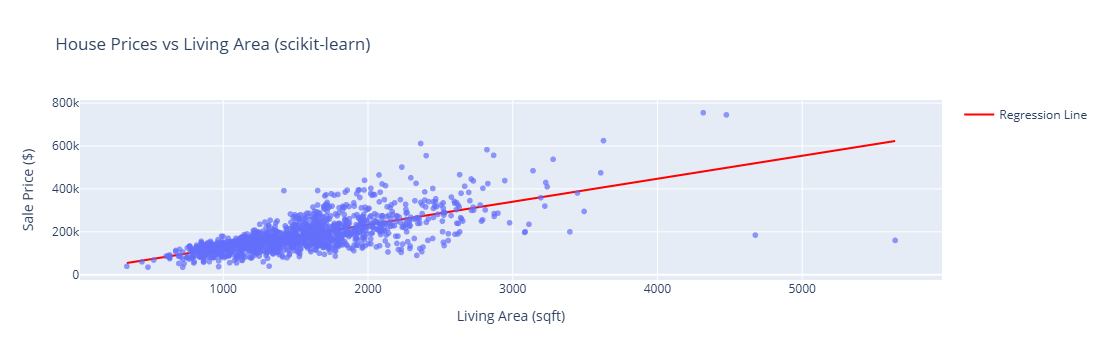

In [41]:
import plotly.express as px

# Create a DataFrame with predictions
results = pd.DataFrame({
    'GrLivArea': X['GrLivArea'],
    'SalePrice': y,
    'Predicted': model.predict(X)
})

# Interactive scatter plot with regression line
fig = px.scatter(results, x='GrLivArea', y='SalePrice', 
                 title='House Prices vs Living Area (scikit-learn)',
                 labels={'GrLivArea': 'Living Area (sqft)', 'SalePrice': 'Sale Price ($)'},
                 opacity=0.7)

# Add regression line
fig.add_scatter(x=results['GrLivArea'], y=results['Predicted'], 
               mode='lines', name='Regression Line', line=dict(color='red'))

# Customize layout
fig.update_layout(showlegend=True, hovermode='x unified')
fig.show()

- I was trying to see the change after changing scale of area.
